<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/17%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import load_digits

#시간/순서의 개념을 만들 수 있다. <- 시계열 테크닉 쓸 수 있다
#시계열 데이터를 > 시간/순서의 개념을 없애서 정통적인 기법 사용 가능

In [17]:
data = load_digits()

In [ ]:
data.images

In [20]:
data.images.shape

(1797, 8, 8)

In [21]:
import matplotlib.pyplot as plt

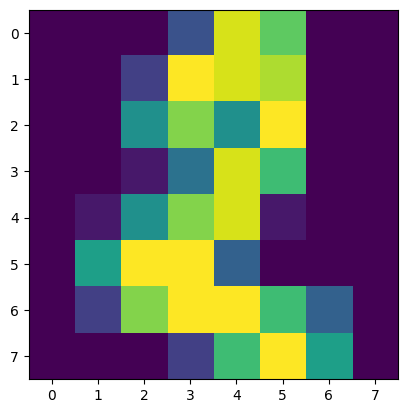

In [22]:
plt.imshow(data.images[2])

In [4]:
!pip install -U aeon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 36.9 MB/s eta 0:00:00


In [5]:
from aeon.datasets import load_arrow_head, load_basic_motions

In [11]:
X, y = load_arrow_head('train', return_type='numpy2d')
#X, y = load_arrow_head('train')   3d 표현 자연어처리에 필요

#타임시리즈 #타임시리즈시퀀스

In [12]:
X.shape

(36, 251)

In [15]:
X[1]

array([-1.7745713 , -1.7740359 , -1.7765863 , -1.7307487 , -1.6962683 ,
       -1.6573775 , -1.6362272 , -1.6098068 , -1.5434388 , -1.4861735 ,
       -1.4555963 , -1.3918069 , -1.3205917 , -1.2596627 , -1.2183342 ,
       -1.146344  , -1.0521042 , -0.94822635, -0.89339877, -0.78589953,
       -0.68385345, -0.57293012, -0.49669852, -0.38615564, -0.25840782,
       -0.17280578, -0.09527782,  0.00428827,  0.12645611,  0.20264544,
        0.25230167,  0.36048009,  0.44598349,  0.52665654,  0.58079084,
        0.63372742,  0.71462028,  0.73760672,  0.76459355,  0.83140682,
        0.90986478,  0.93283008,  0.9678628 ,  1.0520727 ,  1.0985091 ,
        1.1173077 ,  1.1704557 ,  1.1822962 ,  1.1626254 ,  1.1940072 ,
        1.1922712 ,  1.2243645 ,  1.2405789 ,  1.2405789 ,  1.2229653 ,
        1.2557153 ,  1.2888683 ,  1.2546303 ,  1.2536482 ,  1.287975  ,
        1.304784  ,  1.3040724 ,  1.3210476 ,  1.2858726 ,  1.2853681 ,
        1.2678363 ,  1.2482387 ,  1.2256609 ,  1.1625986 ,  1.14

In [14]:
y[1]

'1'

#가속센서, 자이로센서  (핸드폰)

In [24]:
X, y = load_basic_motions()

In [26]:
X.shape

(80, 6, 100)

In [28]:
# 100밀리센컨 동안 자이론센서 데이터 6개가 나오는게 80개
#(x,y,z,,x,y,z)

In [30]:
#(a:[x,y,z],g:[x,y,z])

SyntaxError: ignored

In [40]:
X[1,:,4]

array([ 3.256906, -6.969257, -2.730436, -2.743274,  0.615239, -3.417107])

In [41]:
y[1]

'standing'

# 시계열 / sequence방식 예측 < i.id(x) 앞 뒤 상관성 있음 <- 파악

In [43]:
X_ = X.reshape(80,-1)

In [44]:
X_

array([[ 0.079106,  0.079106, -0.903497, ..., -0.063921, -0.063921,
        -0.03196 ],
       [ 0.377751,  0.377751,  2.952965, ..., -0.135832,  0.034624,
         0.034624],
       [-0.813905, -0.813905, -0.424628, ..., -0.372872, -0.423476,
        -0.423476],
       ...,
       [-0.046089, -0.283051, -0.587748, ...,  0.516694,  0.740418,
        -4.399891],
       [-2.178746, -2.178746, -0.448056, ...,  2.753927,  2.764581,
         2.764581],
       [ 0.901645,  0.901645, -0.054697, ...,  0.484734, -0.721774,
        -1.77647 ]])

In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
y_ = le.fit_transform(y)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_, y_)

KNeighborsClassifier()

In [52]:
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier

In [53]:
knn_t = KNeighborsTimeSeriesClassifier()

In [57]:
X.shape

(80, 6, 100)

In [58]:
X_.shape

(80, 600)

In [59]:
knn_t.fit(X, y_)

KNeighborsTimeSeriesClassifier()

In [35]:
from sklearn.datasets import load_iris

In [36]:
data = load_iris(as_frame=True)

In [37]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# darts 는 생략
# scalecast 실용적 관점에서 씀